In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importind libraries


In [75]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

#Impoting dataset

In [76]:
df1 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/movies.utf.csv',sep = '::')

<ipython-input-76-8ef384d34bfb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/movies.utf.csv',sep = '::')


In [77]:
df1.columns =['Id', 'Title', 'Genre']

In [78]:
df1.head()

,Id,Title,Genre
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,"
1,3,Grumpier Old Men (1995),"Comedy|Romance,,"
2,4,Waiting to Exhale (1995),"Comedy|Drama,,"
3,5,Father of the Bride Part II (1995),"Comedy,,"
4,6,Heat (1995),"Action|Crime|Thriller,,"


In [79]:
df2 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/ratings.utf.csv',sep = '::')

<ipython-input-79-a3c535cc01df>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/ratings.utf.csv',sep = '::')


In [80]:
df2.columns =['User Id', 'Movie Id', 'Rating', 'Timestamp']

In [81]:
df2.head()

,User Id,Movie Id,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [82]:
df3 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/users.utf.csv',sep = '::')

<ipython-input-82-5baab154dcc5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3 = pd.read_csv('/content/drive/MyDrive/CODSOFT/TASK 2/users.utf.csv',sep = '::')


In [83]:
df3.columns = ['User Id', 'Gender', 'Age', 'Occupation', 'Zip-code']

In [84]:
df3.head()

,User Id,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [85]:
dataset = pd.concat([df1,df2,df3],axis=1)

In [86]:
dataset.head(10)

,Id,Title,Genre,User Id,Movie Id,Rating,Timestamp,User Id,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),"Adventure|Children's|Fantasy,,",1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),"Comedy|Romance,,",1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),"Comedy|Drama,,",1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),"Comedy,,",1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),"Action|Crime|Thriller,,",1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),"Comedy|Romance,,",1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),"Adventure|Children's,,",1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),"Action,,",1,594,4,978302268,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),"Action|Adventure|Thriller,,",1,919,4,978301368,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)","Comedy|Drama|Romance,",1,595,5,978824268,11.0,F,25.0,1.0,04093


In [87]:
dataset.drop(['Id','Title', 'User Id','Gender','Age','Occupation', 'Zip-code'], axis=1, inplace=True)

In [88]:
pd.isnull(dataset).sum()

Genre        996326
Movie Id          0
Rating            0
Timestamp         0
dtype: int64

In [89]:
dataset.dropna(inplace=True)

In [90]:
dataset.shape

(3882, 4)

In [91]:
dataset.duplicated().any()

False

In [92]:
dataset['Rating'].value_counts()

4    1318
3    1099
5     840
2     432
1     193
Name: Rating, dtype: int64

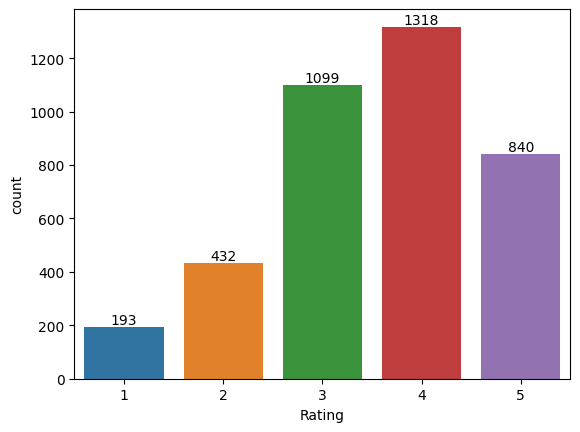

In [93]:
ax = sns.countplot(dataset, x='Rating')
for bars in  ax.containers:
   ax.bar_label(bars)

In [94]:
col_order=['Genre', 'Movie Id', 'Timestamp', 'Rating']
dataset=dataset[col_order]

In [95]:
dataset.head(5)

,Genre,Movie Id,Timestamp,Rating
0,"Adventure|Children's|Fantasy,,",661,978302109,3
1,"Comedy|Romance,,",914,978301968,3
2,"Comedy|Drama,,",3408,978300275,4
3,"Comedy,,",2355,978824291,5
4,"Action|Crime|Thriller,,",1197,978302268,3


#Data preprocessing

In [96]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [97]:
print(X)

[["Adventure|Children's|Fantasy,," 661 978302109]
 ['Comedy|Romance,,' 914 978301968]
 ['Comedy|Drama,,' 3408 978300275]
 ...
 ['Drama,,' 2174 978126491]
 ['Drama,,' 912 978985294]
 ['Drama|Thriller,' 2248 978126172]]


In [98]:
print(Y)

[3 3 4 ... 3 5 4]


In [100]:
from sklearn.preprocessing import LabelEncoder
le0 = LabelEncoder()
le3 = LabelEncoder()
X[:,0] = le0.fit_transform(X[:,0])

In [101]:
print(X)

[[152 661 978302109]
 [289 914 978301968]
 [254 3408 978300275]
 ...
 [337 2174 978126491]
 [337 912 978985294]
 [369 2248 978126172]]


#Training Dataset

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [103]:
print(X_train)

[[240 2717 978299947]
 [123 3260 978245065]
 [388 2757 986157090]
 ...
 [221 3178 978196210]
 [331 1921 978136684]
 [111 2423 978153058]]


In [104]:
print(Y_train)

[5 4 4 ... 4 4 3]


#Featue Scaling

In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
Y_train = sc.fit_transform(Y_train.reshape(-1,1))
Y_test = sc.fit_transform(Y_test.reshape(-1,1))

In [106]:
print(X_train)

[[-0.349944    0.84238097 -0.13051838]
 [-1.45248767  1.3439417  -0.15301534]
 [ 1.04472662  0.87932835  3.09024338]
 ...
 [-0.52898955  1.26819957 -0.17304175]
 [ 0.50758996  0.10712803 -0.19744235]
 [-1.56556907  0.5708177  -0.1907304 ]]


In [107]:
from sklearn import utils, preprocessing
lab_enc = preprocessing.LabelEncoder()
Y_train = lab_enc.fit_transform(Y_train)
print(utils.multiclass.type_of_target(Y_train))
print(utils.multiclass.type_of_target(Y_train.astype('int')))
Y_test = lab_enc.fit_transform(Y_test)
print(utils.multiclass.type_of_target(Y_test))
print(utils.multiclass.type_of_target(Y_test.astype('int')))

multiclass
multiclass
multiclass
multiclass


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)

LogisticRegression()

In [112]:
from sklearn.metrics import accuracy_score
y_pred_log = model_log.predict(X_test)
accuracy_score(Y_test,y_pred_log)

0.3356223175965665